<a href="https://colab.research.google.com/github/suhaneemish/customer-segmentation-colab/blob/main/data_science1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [4]:
# Load data
data = pd.read_csv("user_data.csv")


In [5]:
# Feature selection
features = ["average_watch_time", "movies_watched", "unique_genres"]

In [6]:
# Feature engineering (example)
data["action_movies"] = data["action_movies"].map({"Yes": 1, "No": 0})  # Convert categorical data to numeric
data["comedy_movies"] = data["comedy_movies"].map({"Yes": 1, "No": 0})
data["drama_movies"] = data["drama_movies"].map({"Yes": 1, "No": 0})


In [7]:
user_data = data[features + ["action_movies", "comedy_movies", "drama_movies"]]  # Include new features


In [8]:
# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_data)

In [12]:
# Handle missing values (replace with this section)
# Option 1: Impute missing values (e.g., using mean imputation)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
imputed_data = imputer.fit_transform(scaled_data)



In [11]:
# K-Means clustering with chosen K (e.g., K=4 based on the elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(imputed_data)  # Use imputed_data or data_dropna depending on your choice


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [13]:
# Assign cluster labels to users
data["cluster_label"] = kmeans.labels_


In [14]:
# Silhouette score evaluation (optional)
silhouette_avg = silhouette_score(imputed_data, kmeans.labels_)  # Use imputed_data here
print("Silhouette Score:", silhouette_avg)  # Higher score indicates better cluster separation

Silhouette Score: 0.4419845386433564


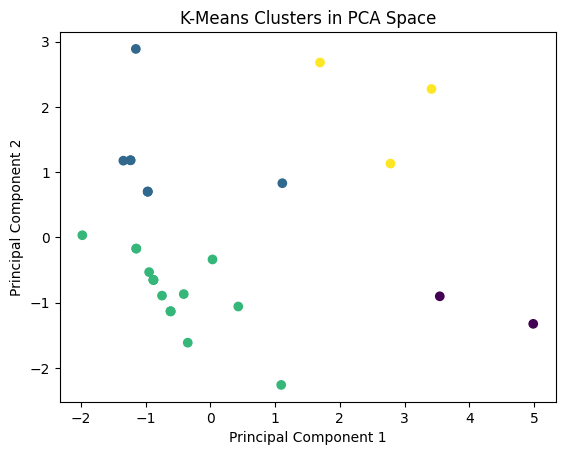

In [17]:
# Dimensionality reduction with PCA (optional)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization (optional)

# Dimensionality reduction with PCA for visualization (optional)

pca_data = pca.fit_transform(imputed_data)  # Transform data using PCA

# Visualize clusters using PCA components
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_)  # Color points by cluster label
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters in PCA Space")
plt.show()